<a href="https://colab.research.google.com/github/hodanourian/Forecasting-and-Predictive-Analytics/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

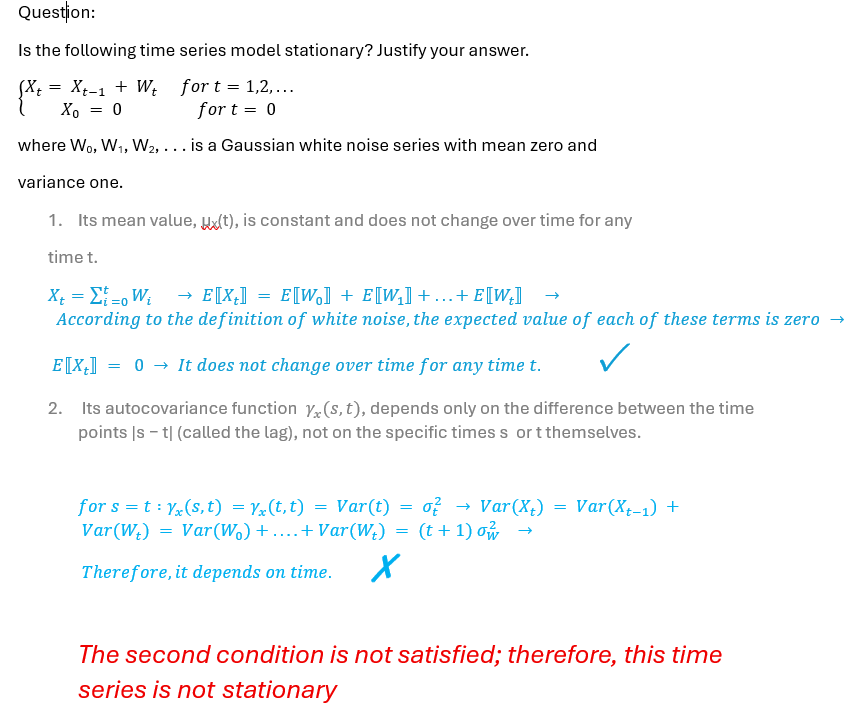

# Random walk with random initial value

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



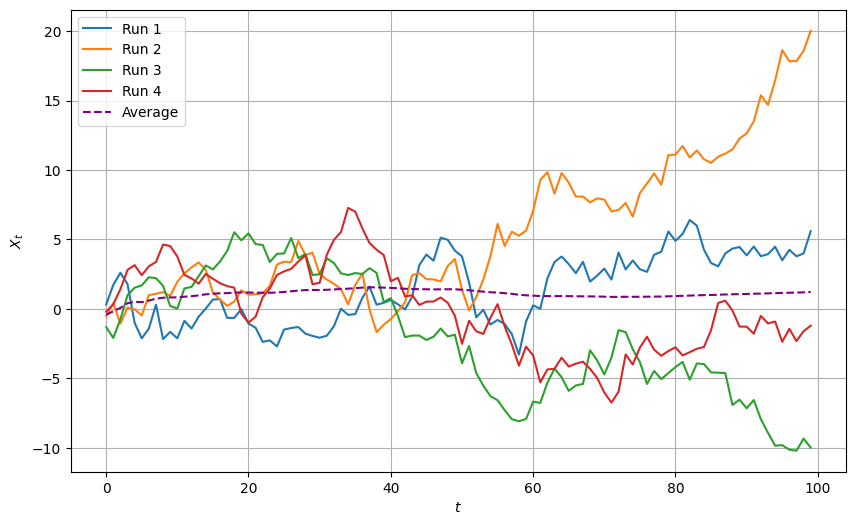

In [6]:

# Multiple runs

# Define parameters
n = 100  # number of steps
mean = 0  # mean of the white noise series
std_dev = 1  # standard deviation of the white noise series
num_runs = 4 # number of random walk runs

# Generate random walk runs
runs = []
for _ in range(num_runs):
    X = np.zeros(n)
    X[0] = np.random.normal(mean, std_dev)
    for t in range(1, n):
        X[t] = X[t - 1] + np.random.normal(mean, std_dev)
    runs.append(X)

# Calculate cumulative average inside each run
cumulative_avgs = []
for run in runs:
    cumulative_avg = np.cumsum(run) / (np.arange(n) + 1)
    cumulative_avgs.append(cumulative_avg)

# Calculate overall cumulative average across all runs
overall_cumulative_avg = np.mean(cumulative_avgs, axis=0)

# Plot all runs and overall cumulative average on the same plot
plt.figure(figsize=(10, 6))
for i in range(num_runs):
    plt.plot(range(n), runs[i], label=f'Run {i+1}')
plt.plot(range(n), overall_cumulative_avg, linestyle='--', color='purple', label='Average')
plt.xlabel('$t$')
plt.ylabel('$X_t$')
plt.legend()
plt.grid(True)
plt.show()

# KPSS Test for Stationarity

In [3]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 13.2 MB/s eta 0:00:00


In [4]:
from arch.unitroot import KPSS

# Perform KPSS test
kpss_test = KPSS(X)
p_value = kpss_test.pvalue

# Print the results
print(f'KPSS test p-value: {p_value:.3f}\n')

# Interpret the results
alpha = 0.05
if p_value >= alpha:
     print(f'The time series is stationary (fail to reject "H0: The time series is stationary" at a {100*alpha:.0f}% significance level).')
else:
    print(f'The time series is not stationary (reject "H0: The time series is stationary" at a {100*alpha:.0f}% significance level).')

KPSS test p-value: 0.292

The time series is stationary (fail to reject "H0: The time series is stationary" at a 5% significance level).


/tmp/ipython-input-1114291617.py:4: DeprecationWarning: Lag selection has changed to use a data-dependent method. To use the old method that only depends on time, set lags=-1
  kpss_test = KPSS(X)
